In [74]:
# -*- coding: utf-8 -*-
"""
HW1 Code CS 3753 Data Science
Prof Jianhua Ruan
@author: Sebastian Klemkosky
abc123: lmo120
"""
import random

import matplotlib.pyplot as plt
from IPython import get_ipython


# Q1 Selection Sort 

Although not required, it should be in-place sorting (sort the original list)

In [75]:

def selectionSort(numList):
    """Given a list of numbers, return a list in sorted order (least to largest)
        Note that the function may change the original list (in-place sorting)
    """
    #Traverse thru the list
    for i in range(len(numList)):

        #find the min element in the remaining unsorted list
        min_i = i
        for j in range(i + 1, len(numList)):
            if numList[min_i] > numList[j]:
                min_i = j
        
        #swap the found min with the first element
        numList[i], numList[min_i] = numList[min_i], numList[i]
    
    return numList


#%% Testing selection sort

a = [random.randint(0, 20) for _ in range(10)]
print('\n\n********* Q1 *********')
print('random array is: ', a)
    
b = selectionSort(a)
print('selection sorted array is: ', b)



if b == sorted(a):
    print('selectionSort is correct') 

    print('profiling running time of python sorted function on a:')
    get_ipython().run_line_magic('timeit', 'sorted(a)')

    print('profiling running time of my merge sort function on a:')
    get_ipython().run_line_magic('timeit', 'selectionSort(a)')

else:
# replace the following statement with a print statement if your selection sort is incorrect 
# but you want to continue with the rest of the code
    raise SystemExit('selectionSort is incorrect')





********* Q1 *********
random array is:  [3, 7, 17, 0, 20, 8, 12, 12, 11, 17]
selection sorted array is:  [0, 3, 7, 8, 11, 12, 12, 17, 17, 20]
selectionSort is correct
profiling running time of python sorted function on a:
The slowest run took 9.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 252 ns per loop
profiling running time of my merge sort function on a:
100000 loops, best of 5: 8.73 µs per loop


# Q2a. Merge function

In [76]:


def merge(sortListA, sortListB):
    """Given two non-decreasingly sorted list of numbers, 
       return a single merged list in non-decreasing order
    """
    #resulting list
    mergedList = []

    #left and right iterators
    i = j = 0

    #traverse thru both lists while there are still elements in both
    while i < len(sortListA) and j < len(sortListB):
        
        #check listA[i] with listB[j] 
        if sortListA[i] < sortListB[j]:

            mergedList.append(sortListA[i])
            #mergedList = mergedList + [sortListA[i]]

            i += 1
        else:
          
            mergedList.append(sortListB[j])
            #mergedList = mergedList + [sortListB[j]]

            j += 1


    #in case there are still elements in either list then extend the remaining elements
    mergedList.extend(sortListA[i:])
    mergedList.extend(sortListB[j:])

    return mergedList


#%% Testing merge function

a = sorted([random.randint(0, 10) for _ in range(5)]) # a is sorted 
b = sorted([random.randint(0, 10) for _ in range(4)]) # b is sorted

print('\n\n********* Q2a *********')
print('a is: ', a)
print('b is: ', b)

c = merge(a, b) # c should be sorted(a+b)
print('merged result: ', c)

if (c == sorted(a + b)):
    print('merge is correct')
else:
# replace the following statement with a print statement if your merge function is incorrect 
# but you want to continue with the rest of the code
    raise SystemExit('merge is incorrect')    






********* Q2a *********
a is:  [0, 0, 3, 5, 9]
b is:  [0, 1, 2, 8]
merged result:  [0, 0, 0, 1, 2, 3, 5, 8, 9]
merge is correct


# Q2b merge sort 

Not an in-place sorting (returns a new sorted list)

In [77]:
def mergeSort(numList):
    """
    Given a list of numbers in random order, 
    return a new list sorted in non-decreasing order, 
    and leave the original list unchanged.
    """

    #In case the numList has 1 or less elements
    if len(numList) <= 1:
      return numList

    #Find the middle of the list
    mid = int(len(numList) / 2)

    #listA is everything up to the mid point
    sortListA = mergeSort(numList[:mid])

    #listB is everything after the mid point
    sortListB = mergeSort(numList[mid:])

    sortedList = merge(sortListA, sortListB)

    return sortedList


#%% Test mergeSort function
    
    
a = [random.randint(0, 20) for _ in range(10)]
    

print('\n\n********* Q2b *********')
print('random array is: ', a)


b = mergeSort(a)
print('merge sorted array is: ', b)


if b == sorted(a):
    print('mergeSort is correct') 
    print('profiling running time of python sorted function on a:')
    get_ipython().run_line_magic('timeit', 'sorted(a)')

    print('profiling running time of my merge sort function on a:')
    get_ipython().run_line_magic('timeit', 'mergeSort(a)')

else:
# replace the following statement with a print statement if your merge sort is incorrect 
# but you want to continue with the rest of the code
    raise SystemExit('mergeSort is incorrect')








********* Q2b *********
random array is:  [17, 3, 16, 8, 10, 5, 3, 10, 7, 18]
merge sorted array is:  [3, 3, 5, 7, 8, 10, 10, 16, 17, 18]
mergeSort is correct
profiling running time of python sorted function on a:
The slowest run took 9.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 338 ns per loop
profiling running time of my merge sort function on a:
10000 loops, best of 5: 21.3 µs per loop


# Q3 Experiment and plot

Run the three sorting algorithms on different input sizes and collect running time

In [78]:
import time

# input size is 500 * (1, 2, 4, ..., 32)
sizes = [500 * 2**i for i in range(6)]


merge_sort_time = [0] * len(sizes)
selection_sort_time = [0] * len(sizes)
quick_sort_time = [0] * len(sizes)

print('\n\n********* Q3 *********')
print('Collecting running time (in milliseconds)')

for i in range(len(sizes)):
    print('iteration %d, size = %d' %(i, sizes[i]))
    # random array of size sizes[i]
    a = [random.random() for _ in range(sizes[i])]
    start_time = time.perf_counter()
    sorted(a)
    quick_sort_time[i] = 1000*(time.perf_counter() - start_time) 
    start_time = time.perf_counter()
    mergeSort(a)
    merge_sort_time[i] = 1000*(time.perf_counter() - start_time) 
    start_time = time.perf_counter()
    selectionSort(a)
    selection_sort_time[i] = 1000*(time.perf_counter() - start_time)  




********* Q3 *********
iteration 0, size = 500
iteration 1, size = 1000
iteration 2, size = 2000
iteration 3, size = 4000
iteration 4, size = 8000
iteration 5, size = 16000


## Complete the following code to plot the running time; use the style show in the homework document as template, reproduce as much detail as possible.



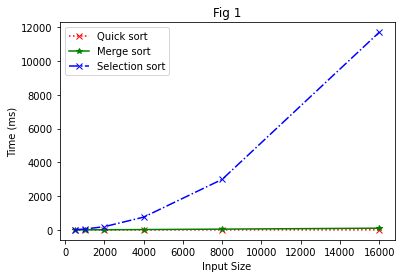

In [79]:
#%% Q3a. plot running time (Fig 1)

#create line chart

#Quick Sort
plt.plot(sizes, quick_sort_time, color='red', marker='x', linestyle=':', label='Quick sort')

#Merge Sort
plt.plot(sizes, merge_sort_time, color='green', marker='*', linestyle='-', label='Merge sort')

#Selection Sort
plt.plot(sizes, selection_sort_time, color='blue', marker='x', linestyle='-.', label='Selection sort')

#Axis Scaling
#plt.ylim((0,10000))

#Add title
plt.title("Fig 1")

#Add X-axis label
plt.xlabel("Input Size")

#Add Y-axis label
plt.ylabel("Time (ms)")

#Legend
plt.legend(loc="upper left")


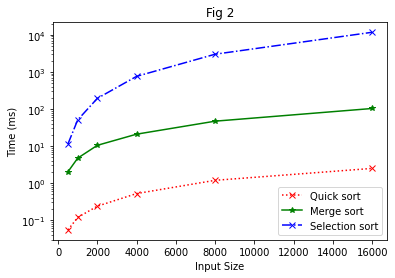

In [80]:
#%% Q3b. plot running time (Fig 2)

#create line chart

#Quick Sort
plt.plot(sizes, quick_sort_time, color='red', marker='x', linestyle=':', label='Quick sort')

#Merge Sort
plt.plot(sizes, merge_sort_time, color='green', marker='*', linestyle='-', label='Merge sort')

#Selection Sort
plt.plot(sizes, selection_sort_time, color='blue', marker='x', linestyle='-.', label='Selection sort')

#Axis Scaling
plt.yscale('log')

#Add title
plt.title("Fig 2")

#Add X-axis label
plt.xlabel("Input Size")

#Add Y-axis label
plt.ylabel("Time (ms)")

#Legend
plt.legend(loc="lower right")

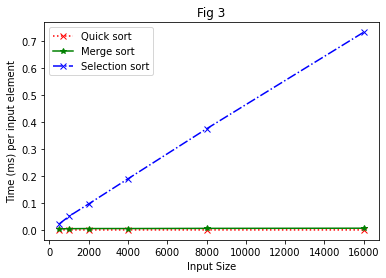

In [81]:
#%% Q3c. plot running time per input element (Fig 3)

#create line chart

#Quick Sort Time / Size
qs = [a/b for a,b in zip(quick_sort_time, sizes)]

plt.plot(sizes, qs, color='red', marker='x', linestyle=':', label='Quick sort')

#Merge Sort Time / Size
ms = [a/b for a,b in zip(merge_sort_time, sizes)]

plt.plot(sizes, ms, color='green', marker='*', linestyle='-', label='Merge sort')

#Selection Sort
ss = [a/b for a,b in zip(selection_sort_time, sizes)]

plt.plot(sizes, ss, color='blue', marker='x', linestyle='-.', label='Selection sort')

#Axis Scaling
#plt.yscale('log')

#Add title
plt.title("Fig 3")

#Add X-axis label
plt.xlabel("Input Size")

#Add Y-axis label
plt.ylabel("Time (ms) per input element")

#Legend
plt.legend(loc="upper left")


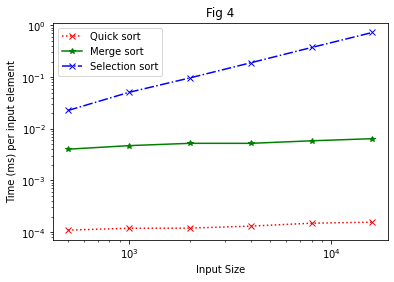

In [82]:


#%% Q3d. plot running time per input element (Fig 4)

#create line chart

#Quick Sort Time / Size
qs = [a/b for a,b in zip(quick_sort_time, sizes)]

plt.plot(sizes, qs, color='red', marker='x', linestyle=':', label='Quick sort')

#Merge Sort Time / Size
ms = [a/b for a,b in zip(merge_sort_time, sizes)]

plt.plot(sizes, ms, color='green', marker='*', linestyle='-', label='Merge sort')

#Selection Sort
ss = [a/b for a,b in zip(selection_sort_time, sizes)]

plt.plot(sizes, ss, color='blue', marker='x', linestyle='-.', label='Selection sort')

#Axis Scaling
plt.yscale('log')
plt.xscale('log')

#Add title
plt.title("Fig 4")

#Add X-axis label
plt.xlabel("Input Size")

#Add Y-axis label
plt.ylabel("Time (ms) per input element")

#Legend
plt.legend(loc="upper left")